In [1]:
import numpy as np
import torch


import json
from torch.utils.data import DataLoader
from torch.optim import SGD 
from torch import nn

In [2]:
import utils_generic as generic
import singletask_simple as st
import model_confs as confs

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.manual_seed(27)

# Datos ConvAI2

In [4]:
with open('Datasets\ConvAI2\convai2_complete.json','r') as f:
    data = json.load(f)

In [5]:
convai_train = data['train']
convai_val = data['validation']



convai_train_token = generic.tokenize_dataset(convai_train,['about','to','as'],"distilbert-base-uncased") 
convai_val_token = generic.tokenize_dataset(convai_val,['about','to','as'],"distilbert-base-uncased") 

In [6]:
convai_train_dataset = {}
for task in ['to','as','about']:
    convai_train_dataset[task] = st.DatasetSingleTaskSimple(convai_train_token,task,eval=False)

In [7]:
convai_val_dataset = {}
for task in ['to','as','about']:
    convai_val_dataset[task] = st.DatasetSingleTaskSimple(convai_val_token,task,eval=False)

## Datos md_gender

In [8]:
with open('Datasets\md_gender\md_complete.json','r',encoding="utf8") as f:
    md_data = json.load(f)

In [9]:
md_tokenized = generic.tokenize_dataset(md_data,['about','to','as'],"distilbert-base-uncased") 


md_dataset = {}
for task in ['to','as','about']:
    md_dataset[task] = st.DatasetSingleTaskSimple(md_tokenized,task,eval=True)

# Creación dataloaders

In [10]:
dl_train = {}
for task in ['to','as','about']:
    dl_train[task] = DataLoader(convai_train_dataset[task],batch_size=128,shuffle=True,collate_fn=st.collate_fn)

In [11]:
dl_val = {}
for task in ['to','as','about']:
    dl_val[task] = DataLoader(convai_val_dataset[task],batch_size=128,shuffle=True,collate_fn=st.collate_fn)

In [12]:
dl_eval = {}
for task in ['to','as','about']:
    dl_eval[task] = DataLoader(md_dataset[task],batch_size=128,shuffle=False,collate_fn=st.collate_fn)

# ABOUT

In [13]:
model = st.SingleTaskSimple(confs.distilbert_conf).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.7203086409003893 	 Validation loss: 0.6730697609610476 
  1%|          | 574/57400 [01:57<2:34:58,  6.11it/s]
Epoch 2 	 Training loss: 0.6387234277218476 	 Validation loss: 0.5701241584147437 
  2%|▏         | 1148/57400 [03:53<2:37:25,  5.96it/s]
Epoch 3 	 Training loss: 0.49597744108907854 	 Validation loss: 0.4242690362162509 
  3%|▎         | 1722/57400 [05:48<3:05:02,  5.01it/s]
Epoch 4 	 Training loss: 0.40533645025321413 	 Validation loss: 0.37274685300002663 
  4%|▍         | 2296/57400 [07:42<2:57:43,  5.17it/s]
Epoch 5 	 Training loss: 0.3700523220963179 	 Validation loss: 0.35183492959555934 
  5%|▌         | 2870/57400 [09:36<3:36:25,  4.20it/s]
Epoch 6 	 Training loss: 0.3498835803272417 	 Validation loss: 0.3326016553377701 
  6%|▌         | 3444/57400 [11:31<2:56:30,  5.09it/s]
Epoch 7 	 Training loss: 0.33602347069189525 	 Validation loss: 0.3213327299740355 
  7%|▋         | 4018/57400 [13:27<2:27:10,  6.05it/s]
Epoch 8 	 Training loss: 0.327

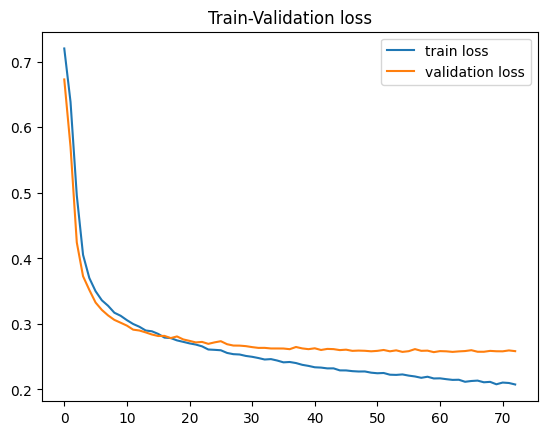

In [14]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

st.train_function_early_stop(model,num_epochs,dl_train['about'],optimizer,early_stop=10,dl_val=dl_val['about'],save_path='m1_distilbert_simple_ABOUT_best')

# TO

In [15]:
model = st.SingleTaskSimple(confs.distilbert_conf).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.7581102906203852 	 Validation loss: 0.7034161666692313 
  1%|          | 574/57400 [01:54<2:36:22,  6.06it/s]
Epoch 2 	 Training loss: 0.7048714131843753 	 Validation loss: 0.6964034690695294 
  2%|▏         | 1148/57400 [03:46<3:05:05,  5.07it/s]
Epoch 3 	 Training loss: 0.7010612649784687 	 Validation loss: 0.6944824588500847 
  3%|▎         | 1722/57400 [05:40<2:38:05,  5.87it/s]
Epoch 4 	 Training loss: 0.6996747016491375 	 Validation loss: 0.6946983296992415 
  4%|▍         | 2296/57400 [07:33<3:08:06,  4.88it/s]
Epoch 5 	 Training loss: 0.698621836481194 	 Validation loss: 0.6935090776217185 
  5%|▌         | 2870/57400 [09:27<2:29:25,  6.08it/s]
Epoch 6 	 Training loss: 0.6977685088687657 	 Validation loss: 0.695036353701252 

1 epoch without improvement
  6%|▌         | 3444/57400 [11:20<3:04:51,  4.86it/s]
Epoch 7 	 Training loss: 0.6978648293516777 	 Validation loss: 0.6948442418696517 

2 epoch without improvement
  7%|▋         | 4018/57400 [13:13

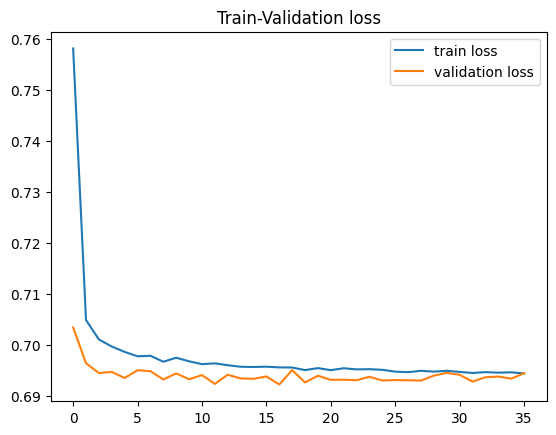

In [16]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

st.train_function_early_stop(model,num_epochs,dl_train['to'],optimizer,early_stop=10,dl_val=dl_val['to'],save_path='m1_distilbert_simple_TO_best')

# AS

In [17]:
model = st.SingleTaskSimple(confs.distilbert_conf).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.7475430695437388 	 Validation loss: 0.7024668758198366 
  1%|          | 574/57400 [01:53<3:08:21,  5.03it/s]
Epoch 2 	 Training loss: 0.703012781068423 	 Validation loss: 0.695638993028867 
  2%|▏         | 1148/57400 [03:46<3:09:00,  4.96it/s]
Epoch 3 	 Training loss: 0.7005558344129902 	 Validation loss: 0.6948552071037939 
  3%|▎         | 1722/57400 [05:40<3:00:03,  5.15it/s]
Epoch 4 	 Training loss: 0.698376042502267 	 Validation loss: 0.6950489060353424 
  4%|▍         | 2296/57400 [07:32<2:24:53,  6.34it/s]
Epoch 5 	 Training loss: 0.6974357130843173 	 Validation loss: 0.6956399062932548 
  5%|▌         | 2870/57400 [09:26<2:24:27,  6.29it/s]
Epoch 6 	 Training loss: 0.6963600121724065 	 Validation loss: 0.6959948044712261 

1 epoch without improvement
  6%|▌         | 3444/57400 [11:20<2:52:27,  5.21it/s]
Epoch 7 	 Training loss: 0.6958500275628492 	 Validation loss: 0.6940077937255471 
  7%|▋         | 4018/57400 [13:13<2:23:27,  6.20it/s]
Epoch 8 	

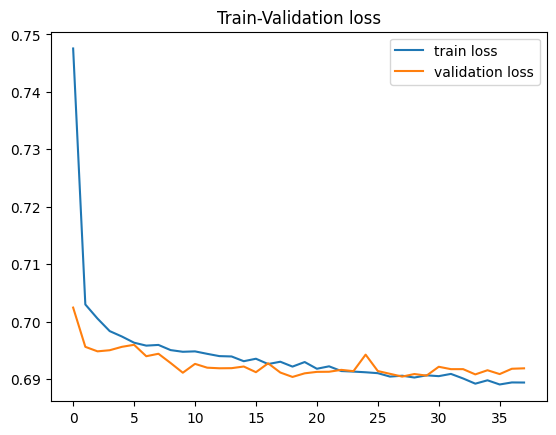

In [18]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

st.train_function_early_stop(model,num_epochs,dl_train['as'],optimizer,early_stop=10,dl_val=dl_val['as'],save_path='m1_distilbert_simple_AS_best')